In [3]:
from qiskit import *
from qiskit.circuit.library import UnitaryGate
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
simulator = AerSimulator()

import numpy as np
import math
import random

from sympy import Matrix
from sympy.physics.quantum import TensorProduct

import matplotlib.pyplot as plt

%run QuantumFourierTransform.ipynb

In [4]:
e= math.e
pi = math.pi
i = 1j

In [9]:
# Given matrix M, outputs M**(2**power)
def MatrixPowersTwo(matrix,power):
    NewMatrix = matrix
    
    for p in range(2**power-1):
        NewMatrix = NewMatrix@matrix
        
    return NewMatrix

In [36]:
def PhaseEstimation(Circuit,Unitary,Vector,Persision):
    # Apply Hadamard Gates to the upper register
    for qubit in range(Persision):
        qc.h(qubit)
    
    qc.barrier(label='Unitaries')
    
    # Generating Controlled U operations
    Unitaries = {}
    for power in range(Persision):
        Unitaries[power] = UnitaryGate(MatrixPowersTwo(Unitary,power),label=f'U_{power}').control(1)
    
    # Adding controled U operations
    for p in range(Persision):
        qc.append(Unitaries[p],[Persision-p-1,Persision])
    
    qc.barrier(label='nQFT')
    
    # Inverse Fourier Transform on the upper register
    nQFT(Circuit, Persision,0)
    
    return Circuit

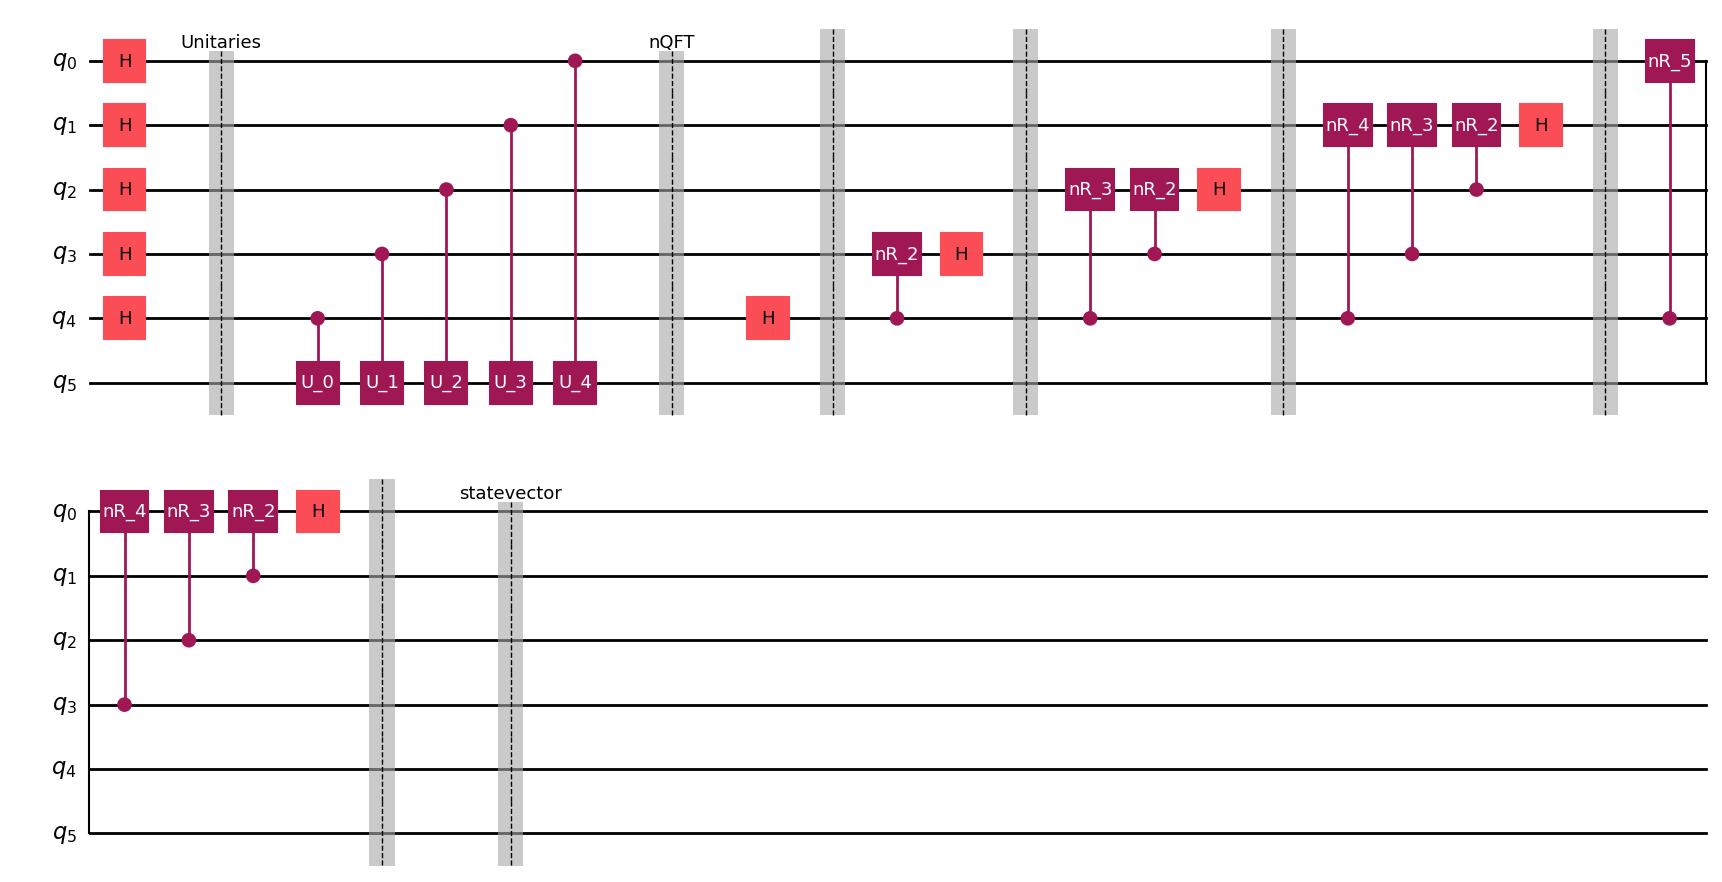

In [39]:
persision = 6
unitary = np.array([[i,0],
                    [0,i]])

eigenvector = np.array([[1],[1]])

qc = QuantumCircuit(persision)

PhaseEstimation(qc,unitary, eigenvector,persision-1)

qc.draw(output='mpl')